In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns

=== Publication Frequency (Sample) ===


,Date,Article_Count
0,2020-01-01,1
1,2020-01-02,7
2,2020-01-03,15
3,2020-01-05,1
4,2020-01-06,19
5,2020-01-07,26
6,2020-01-08,23
7,2020-01-09,14
8,2020-01-10,5
9,2020-01-11,1


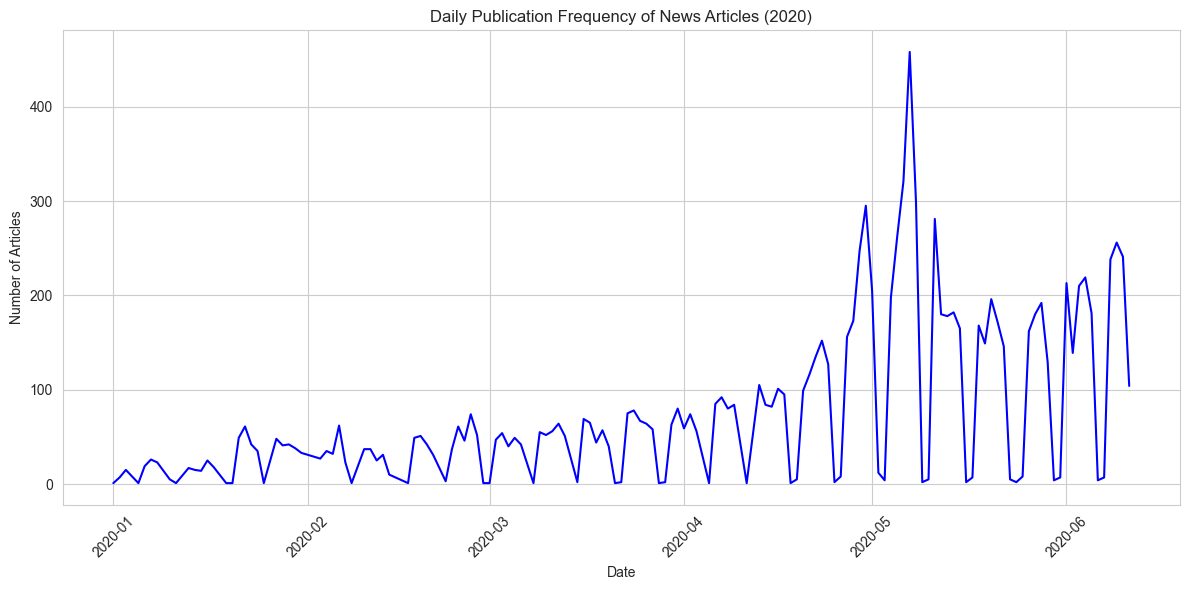


=== Spike Days in Publication Frequency ===


,Date,Article_Count
104,2020-04-29,247
105,2020-04-30,295
110,2020-05-05,262
111,2020-05-06,321
112,2020-05-07,458
113,2020-05-08,299
116,2020-05-11,281
145,2020-06-09,256



=== Sample with Publication Hour ===


,headline,date,publication_hour
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 14:30:54+00:00,14
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 14:45:20+00:00,14
2,71 Biggest Movers From Friday,2020-05-26 08:30:07+00:00,8
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 16:45:06+00:00,16
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 15:38:59+00:00,15



=== Articles by Publication Hour ===


,Hour,Article_Count
0,0,3
1,1,4
2,2,1
3,3,2
4,4,26
5,5,5
6,6,1
7,7,7
8,8,136
9,9,334


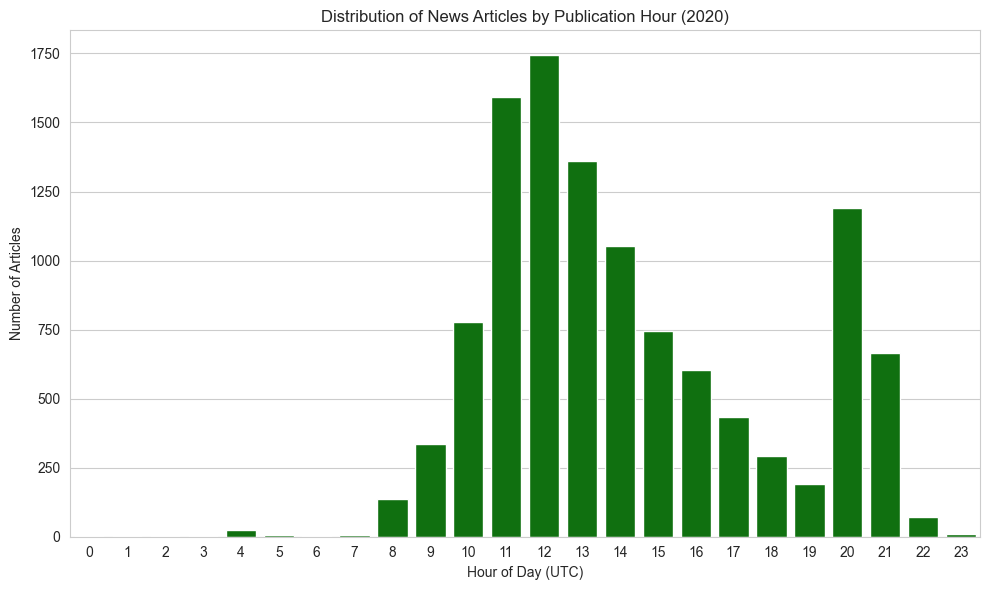

In [2]:
# ---
# title: Time Series Analysis for 2020 Financial News Dataset
# description: Notebook to analyze publication frequency and publishing times of news articles
# ---

# ### 1. Adjust Python Path
# Add project root to Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.time_series_utils import get_publication_frequency, extract_publication_hour

# Set plot style
sns.set_style("whitegrid")

# ### 2. Load Cleaned News Dataset
news_columns = ['headline', 'url', 'publisher', 'date', 'date_only', 'stock']
news_df = pd.read_csv('../data/fnspid_news_cleaned_2020.csv')
for col in news_columns:
    if col not in news_df.columns:
        raise ValueError(f"Missing column: {col}")

# Convert date and date_only to datetime
news_df['date'] = pd.to_datetime(news_df['date'], utc=True)
news_df['date_only'] = pd.to_datetime(news_df['date_only'])

# ### 3. Publication Frequency Over Time
# Get publication frequency
freq_df = get_publication_frequency(news_df, date_column='date_only')
print("=== Publication Frequency (Sample) ===")
display(freq_df.head(10))

# Visualize publication frequency
plt.figure(figsize=(12, 6))
plt.plot(freq_df['Date'], freq_df['Article_Count'], color='blue')
plt.title('Daily Publication Frequency of News Articles (2020)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('task-1-plots/publication_frequency_2020.png')
plt.show()

# Identify spikes (top 5% days)
spike_threshold = freq_df['Article_Count'].quantile(0.95)
spike_days = freq_df[freq_df['Article_Count'] >= spike_threshold]
print("\n=== Spike Days in Publication Frequency ===")
display(spike_days)

# ### 4. Publication Hour Analysis
# Extract publication hour
news_df = extract_publication_hour(news_df, date_column='date')
print("\n=== Sample with Publication Hour ===")
display(news_df[['headline', 'date', 'publication_hour']].head())

# Count articles by hour
hour_counts = news_df['publication_hour'].value_counts().sort_index()
hour_df = pd.DataFrame({'Hour': hour_counts.index, 'Article_Count': hour_counts.values})
print("\n=== Articles by Publication Hour ===")
display(hour_df)

# Visualize publication hour distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Hour', y='Article_Count', data=hour_df, color='green')
plt.title('Distribution of News Articles by Publication Hour (2020)')
plt.xlabel('Hour of Day (UTC)')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.savefig('task-1-plots/publication_hour_distribution_2020.png')
plt.show()

# ### 5. Save Results
freq_df.to_csv('../data/publication_frequency_2020.csv', index=False)
hour_df.to_csv('../data/publication_hour_2020.csv', index=False)